<a href="https://colab.research.google.com/github/GUILLENJV/62f1ab79cc287b001f643389/blob/master/Copia_de_Model_631d8277776f1d001a21e6eb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#learned embedding encoding for a neural network
from numpy import unique
import numpy
from numpy import array
import pandas as pd
import datetime 
from time import sleep
from tqdm import tqdm
import os
from pandas import read_csv
import json
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l1
from keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
#from predict import model 
from sklearn import preprocessing
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [ ]:
# carga los datos
df = pd.read_csv('631d8277776f1d001a21e6eb.csv') 

In [ ]:
df["landing_page_id"].value_counts()

631d72ff99ba21001a8503fa    2631
631d779999ba21001a850416    2628
62566aa432b19a0164d802be    2619
Name: landing_page_id, dtype: int64

In [ ]:
df.head()

,landing_pages_group_id,campaign_id,landing_page_id,traffic_source_id,visitor_device_browser,visitor_device_hardware_family,visitor_device_hardware_model,visitor_device_hardware_vendor,visitor_device_os_family,visitor_device_os_vendor,...,visitor_geo_location_connection_type,visitor_geo_location_countryCode,visitor_geo_location_isp,visitor_geo_location_regionName,visitor_tokens_adh,visitor_tokens_cadid,visitor_tokens_adi,visitor_tokens_add,converted_yes,converted_no
0,631d8277776f1d001a21e6eb,625b9f51e8a8b61071e8585d,62566aa432b19a0164d802be,58939c5eeb1b39e23f2044bb,Chrome Mobile,Edge 5G UW,Edge 5G UW,Motorola,Android,Google,...,Cable/DSL,US,Comcast Cable,Illinois,regcovershocostsolarandbatt,dNFHyOXph,tsbatout,NaN,1.0,0.0
1,631d8277776f1d001a21e6eb,625221af89418f743d9e21a8,631d72ff99ba21001a8503fa,57ac89e0a38746122f4af882,Edge for Android,Edge 5G UW,Edge 5G UW,Motorola,Android,Google,...,Cable/DSL,US,CenturyLink,Florida,regwillcoverowninzipcode,jHGFI03o9,blondejudge,NaN,1.0,0.0
2,631d8277776f1d001a21e6eb,625221af89418f743d9e21a8,62566aa432b19a0164d802be,57ac89e0a38746122f4af882,Chrome Mobile,Edge 5G UW,Edge 5G UW,Motorola,Android,Google,...,Cable/DSL,US,Comcast Cable,Illinois,regcovershocostsolarandbatt,cUD8Oj5njr,solarpergola,NaN,1.0,0.0
3,631d8277776f1d001a21e6eb,626da13a732b314391fd5bea,62566aa432b19a0164d802be,57dfdf25d6bed1662f3cfcaa,Chrome Mobile,Edge 5G UW,Edge 5G UW,Motorola,Android,Google,...,Cable/DSL,US,Frontier Communications,Florida,regwillcover,fPy1_gh8Tt,manroofsolar,NaN,1.0,0.0
4,631d8277776f1d001a21e6eb,625221af89418f743d9e21a8,631d72ff99ba21001a8503fa,57ac89e0a38746122f4af882,Chrome Mobile,Edge 5G UW,Edge 5G UW,Motorola,Android,Google,...,Cellular,US,Verizon Wireless,Florida,regwillcoverowninzipcode,jHGFI03o9,blondejudge,NaN,1.0,0.0


In [ ]:
df.dtypes

landing_pages_group_id                   object
campaign_id                              object
landing_page_id                          object
traffic_source_id                        object
visitor_device_browser                   object
visitor_device_hardware_family           object
visitor_device_hardware_model            object
visitor_device_hardware_vendor           object
visitor_device_os_family                 object
visitor_device_os_vendor                 object
visitor_device_os_version                object
visitor_device_type                      object
visitor_geo_location_cityName            object
visitor_geo_location_connection_type     object
visitor_geo_location_countryCode         object
visitor_geo_location_isp                 object
visitor_geo_location_regionName          object
visitor_tokens_adh                       object
visitor_tokens_cadid                     object
visitor_tokens_adi                       object
visitor_tokens_add                      

In [ ]:
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)

In [ ]:
#!pip install sweetviz

In [ ]:
#import sweetviz as sv

In [ ]:
# Generar el reporte
#sweet_report = sv.analyze(df)

In [ ]:
# Se muestra la salida
#sweet_report.show_notebook()

In [ ]:
df.isna().sum().sort_values()

landing_pages_group_id                     0
visitor_tokens_cadid                       0
visitor_tokens_adh                         0
converted_yes                              0
visitor_device_os_version                  0
visitor_device_hardware_model              0
converted_no                               0
visitor_device_hardware_family             0
visitor_device_hardware_vendor           105
visitor_device_os_family                 105
visitor_device_os_vendor                 105
visitor_device_browser                   105
traffic_source_id                        105
landing_page_id                          105
campaign_id                              105
visitor_device_type                      105
visitor_geo_location_countryCode         107
visitor_geo_location_regionName          107
visitor_tokens_adi                       111
visitor_geo_location_isp                 166
visitor_geo_location_connection_type     169
visitor_geo_location_cityName            330
visitor_to

In [ ]:
df.shape

(7983, 23)

In [ ]:
df = df.drop(['landing_pages_group_id','visitor_tokens_add'], axis=1)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isna().sum().sort_values()

converted_no                              0
visitor_tokens_cadid                      0
visitor_tokens_adh                        0
converted_yes                             0
visitor_device_hardware_family            0
visitor_device_hardware_model             0
visitor_device_os_version                 0
visitor_device_os_vendor                  1
campaign_id                               1
visitor_device_hardware_vendor            1
visitor_device_browser                    1
traffic_source_id                         1
landing_page_id                           1
visitor_device_os_family                  1
visitor_device_type                       1
visitor_geo_location_countryCode          3
visitor_geo_location_regionName           3
visitor_tokens_adi                        5
visitor_geo_location_isp                 59
visitor_geo_location_connection_type     62
visitor_geo_location_cityName           222
dtype: int64

In [ ]:
# Imputamos la variable 
df['visitor_device_os_vendor'].fillna(df['visitor_device_os_vendor'].mode()[0], inplace=True)
df['campaign_id'].fillna(df['campaign_id'].mode()[0], inplace=True)
df['visitor_device_hardware_vendor'].fillna(df['visitor_device_hardware_vendor'].mode()[0], inplace=True)
df['visitor_device_browser'].fillna(df['visitor_device_browser'].mode()[0], inplace=True)
df['traffic_source_id'].fillna(df['traffic_source_id'].mode()[0], inplace=True)
df['landing_page_id'].fillna(df['landing_page_id'].mode()[0], inplace=True)
df['visitor_device_os_family'].fillna(df['visitor_device_os_family'].mode()[0], inplace=True)
df['visitor_device_type'].fillna(df['visitor_device_type'].mode()[0], inplace=True)
df['visitor_geo_location_countryCode'].fillna(df['visitor_geo_location_countryCode'].mode()[0], inplace=True)
df['visitor_geo_location_regionName'].fillna(df['visitor_geo_location_regionName'].mode()[0], inplace=True)
df['visitor_tokens_adi'].fillna(df['visitor_tokens_adi'].mode()[0], inplace=True)
df['visitor_geo_location_isp'].fillna(df['visitor_geo_location_isp'].mode()[0], inplace=True)
df['visitor_geo_location_connection_type'].fillna(df['visitor_geo_location_connection_type'].mode()[0], inplace=True)
df['visitor_geo_location_cityName'].fillna(df['visitor_geo_location_cityName'].mode()[0], inplace=True)

In [ ]:
df.shape

(7738, 21)

In [ ]:
df.isna().sum().sort_values()

campaign_id                             0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_countryCode        0
visitor_geo_location_connection_type    0
visitor_geo_location_cityName           0
converted_yes                           0
visitor_device_type                     0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
landing_page_id                         0
visitor_device_os_version               0
converted_no                            0
dtype: int64

In [ ]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no'],
      dtype='object')

In [ ]:
X = df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no']]

In [ ]:
X = X.astype(str).to_numpy()

In [ ]:
y = df[["landing_page_id"]].to_numpy()

In [ ]:
# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OrdinalEncoder()
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)


X shape: :  (7738, 20)


In [ ]:
encoded_x

array([[12.,  2.,  4., ..., 19.,  1.,  0.],
       [10.,  0., 12., ...,  0.,  1.,  0.],
       [10.,  0.,  4., ..., 11.,  1.,  0.],
       ...,
       [10.,  0., 34., ...,  0.,  1.,  0.],
       [10.,  0.,  4., ..., 11.,  1.,  0.],
       [28.,  2.,  4., ..., 19.,  1.,  0.]])

In [ ]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(label_encoded_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
label_encoded_y

array([0, 1, 0, ..., 2, 0, 1])

In [ ]:
dummy_y

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
#df_encoded_x = pd.DataFrame(encoded_x)
#df_encoded_x.to_csv('encode-data-training.csv')


In [ ]:
#df_encoded_y = pd.DataFrame(dummy_y)
#df_encoded_y.to_csv('encode-data-training_y.csv')


In [ ]:
#label_encoded_y

In [ ]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, dummy_y, test_size=0.30, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Definición del modelo
def modelo_mlp(): 
    model = Sequential()
    model.add(Dense(20, input_dim=X_train.shape[1], 
                kernel_initializer= 'he_uniform',
                activation='relu', activity_regularizer=regularizers.l1(1e-4)))
    model.add(BatchNormalization())
    model.add(Dense(10, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(5, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())  
    model.add(Dense(3, kernel_initializer= 'he_uniform',
                activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
model = modelo_mlp()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 5)                 5

In [ ]:
# Entrenamos el modelo con el dataset
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/100
170/170 [==============================] - 4s 11ms/step - loss: 1.2672 - accuracy: 0.3645 - val_loss: 1.0403 - val_accuracy: 0.4453
Epoch 2/100
170/170 [==============================] - 2s 9ms/step - loss: 1.0932 - accuracy: 0.4164 - val_loss: 0.9516 - val_accuracy: 0.5138
Epoch 3/100
170/170 [==============================] - 1s 6ms/step - loss: 1.0112 - accuracy: 0.4566 - val_loss: 0.8846 - val_accuracy: 0.5444
Epoch 4/100
170/170 [==============================] - 1s 6ms/step - loss: 0.9434 - accuracy: 0.5039 - val_loss: 0.8221 - val_accuracy: 0.5780
Epoch 5/100
170/170 [==============================] - 1s 5ms/step - loss: 0.8986 - accuracy: 0.5203 - val_loss: 0.7653 - val_accuracy: 0.5947
Epoch 6/100
170/170 [==============================] - 1s 7ms/step - loss: 0.8508 - accuracy: 0.5355 - val_loss: 0.7160 - val_accuracy: 0.6034
Epoch 7/100
170/170 [==============================] - 1s 4ms/step - loss: 0.8165 - accuracy: 0.5587 - val_loss: 0.6813 - val_accuracy: 0.606

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

Precisión Entrenamiento: 0.6603
Precisión Prueba:  0.6701


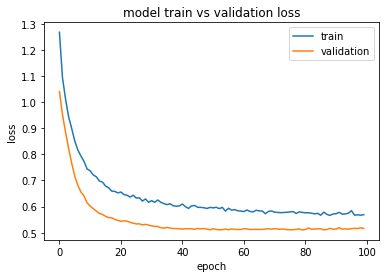

In [ ]:
from matplotlib import pyplot
from numpy import array
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

73/73 [==============================] - 0s 1ms/step


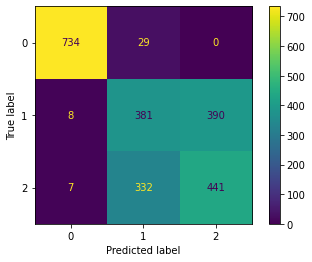

In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       763
           1       0.51      0.49      0.50       779
           2       0.53      0.57      0.55       780

    accuracy                           0.67      2322
   macro avg       0.67      0.67      0.67      2322
weighted avg       0.67      0.67      0.67      2322



In [ ]:
# make class predictions with the model
predictions = (model.predict(X_test[:100])).argmax(1)
predictions

4/4 [==============================] - 0s 4ms/step


array([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2,
       0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2])

In [ ]:
inver_label_encoder = label_encoder.inverse_transform(predictions)

In [ ]:
print(inver_label_encoder)

['631d72ff99ba21001a8503fa' '631d72ff99ba21001a8503fa'
 '631d779999ba21001a850416' '631d779999ba21001a850416'
 '631d779999ba21001a850416' '62566aa432b19a0164d802be'
 '631d779999ba21001a850416' '631d779999ba21001a850416'
 '631d779999ba21001a850416' '631d779999ba21001a850416'
 '631d779999ba21001a850416' '62566aa432b19a0164d802be'
 '631d779999ba21001a850416' '631d779999ba21001a850416'
 '62566aa432b19a0164d802be' '631d72ff99ba21001a8503fa'
 '631d72ff99ba21001a8503fa' '631d779999ba21001a850416'
 '631d72ff99ba21001a8503fa' '631d779999ba21001a850416'
 '62566aa432b19a0164d802be' '631d779999ba21001a850416'
 '631d72ff99ba21001a8503fa' '62566aa432b19a0164d802be'
 '631d72ff99ba21001a8503fa' '631d72ff99ba21001a8503fa'
 '631d779999ba21001a850416' '631d72ff99ba21001a8503fa'
 '631d779999ba21001a850416' '62566aa432b19a0164d802be'
 '631d779999ba21001a850416' '631d72ff99ba21001a8503fa'
 '62566aa432b19a0164d802be' '631d72ff99ba21001a8503fa'
 '631d72ff99ba21001a8503fa' '631d72ff99ba21001a8503fa'
 '631d7799

In [ ]:
df["landing_page_id"].value_counts()

631d72ff99ba21001a8503fa    2595
631d779999ba21001a850416    2586
62566aa432b19a0164d802be    2557
Name: landing_page_id, dtype: int64